In [2]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [3]:
# Cell 2: Load Data
# Load the tech books dataset
books_data = {
    'book_id': range(1, 26),
    'title': [
        "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow",
        "Deep Learning", "Python Machine Learning", 
        "Reinforcement Learning: An Introduction",
        "Pattern Recognition and Machine Learning",
        "Deep Learning with Python", "The Hundred-Page Machine Learning Book",
        "Python for Data Analysis", "Introduction to Statistical Learning",
        "Natural Language Processing with Python",
        "Computer Vision: Algorithms and Applications",
        "Designing Machine Learning Systems", "Grokking Deep Learning",
        "Data Science from Scratch", "Algorithms",
        "Deep Reinforcement Learning Hands-On", "Fluent Python",
        "Speech and Language Processing", "Machine Learning Engineering",
        "Probabilistic Machine Learning: An Introduction",
        "Deep Learning for Computer Vision", "Python Data Science Handbook",
        "Introduction to Algorithms", "Effective Python",
        "Neural Networks and Deep Learning"
    ],
    'author': [
        "Aurélien Géron", "Ian Goodfellow, Yoshua Bengio, Aaron Courville",
        "Sebastian Raschka", "Richard S. Sutton, Andrew G. Barto",
        "Christopher M. Bishop", "François Chollet", "Andriy Burkov",
        "Wes McKinney", "Gareth James, Daniela Witten", "Steven Bird, Ewan Klein",
        "Richard Szeliski", "Chip Huyen", "Andrew Trask", "Joel Grus",
        "Robert Sedgewick, Kevin Wayne", "Maxim Lapan", "Luciano Ramalho",
        "Dan Jurafsky, James H. Martin", "Andriy Burkov", "Kevin Murphy",
        "Rajalingappaa Shanmugamani", "Jake VanderPlas", "Thomas H. Cormen",
        "Brett Slatkin", "Michael Nielsen"
    ],
    'category': [
        "Machine Learning", "Deep Learning", "Machine Learning", 
        "Reinforcement Learning", "Machine Learning", "Deep Learning",
        "Machine Learning", "Data Science", "Machine Learning", "NLP",
        "Computer Vision", "MLOps", "Deep Learning", "Data Science", "Algorithms",
        "Reinforcement Learning", "Python", "NLP", "MLOps", "Machine Learning",
        "Computer Vision", "Data Science", "Algorithms", "Python", "Deep Learning"
    ],
    'level': [
        "Intermediate", "Advanced", "Intermediate", "Advanced", "Advanced",
        "Beginner", "Beginner", "Beginner", "Intermediate", "Intermediate",
        "Advanced", "Intermediate", "Beginner", "Beginner", "Intermediate",
        "Intermediate", "Intermediate", "Advanced", "Intermediate", "Advanced",
        "Intermediate", "Intermediate", "Advanced", "Intermediate", "Beginner"
    ],
    'rating': [4.6, 4.5, 4.4, 4.7, 4.6, 4.5, 4.3, 4.4, 4.6, 4.2, 4.5, 4.7, 
               4.4, 4.3, 4.5, 4.4, 4.7, 4.6, 4.5, 4.6, 4.3, 4.5, 4.5, 4.5, 4.7],
    'year': [2022, 2016, 2019, 2018, 2006, 2021, 2019, 2022, 2021, 2009, 
             2022, 2022, 2019, 2019, 2011, 2020, 2022, 2023, 2020, 2022, 
             2018, 2016, 2009, 2019, 2015],
    'num_reviews': [1250, 890, 750, 620, 450, 980, 340, 820, 710, 380,
                   560, 890, 420, 510, 890, 340, 920, 450, 380, 520,
                   290, 740, 1100, 560, 380]
}

df = pd.DataFrame(books_data)
print(f"✓ Loaded {len(df)} books")
print(df.head())

✓ Loaded 25 books
   book_id                                              title  \
0        1  Hands-On Machine Learning with Scikit-Learn, K...   
1        2                                      Deep Learning   
2        3                            Python Machine Learning   
3        4            Reinforcement Learning: An Introduction   
4        5           Pattern Recognition and Machine Learning   

                                           author                category  \
0                                  Aurélien Géron        Machine Learning   
1  Ian Goodfellow, Yoshua Bengio, Aaron Courville           Deep Learning   
2                               Sebastian Raschka        Machine Learning   
3              Richard S. Sutton, Andrew G. Barto  Reinforcement Learning   
4                           Christopher M. Bishop        Machine Learning   

          level  rating  year  num_reviews  
0  Intermediate     4.6  2022         1250  
1      Advanced     4.5  2016         

In [4]:
# Cell 3: Basic Statistics
print("\n" + "="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nTotal Books: {len(df)}")
print(f"Average Rating: {df['rating'].mean():.2f}")
print(f"Rating Range: {df['rating'].min():.1f} - {df['rating'].max():.1f}")
print(f"Year Range: {df['year'].min()} - {df['year'].max()}")
print(f"\nCategories: {df['category'].nunique()}")
print(f"Difficulty Levels: {df['level'].nunique()}")


DATASET OVERVIEW

Total Books: 25
Average Rating: 4.50
Rating Range: 4.2 - 4.7
Year Range: 2006 - 2023

Categories: 9
Difficulty Levels: 3



CATEGORY DISTRIBUTION
category
Machine Learning          6
Deep Learning             4
Data Science              3
Reinforcement Learning    2
NLP                       2
Computer Vision           2
MLOps                     2
Algorithms                2
Python                    2
Name: count, dtype: int64


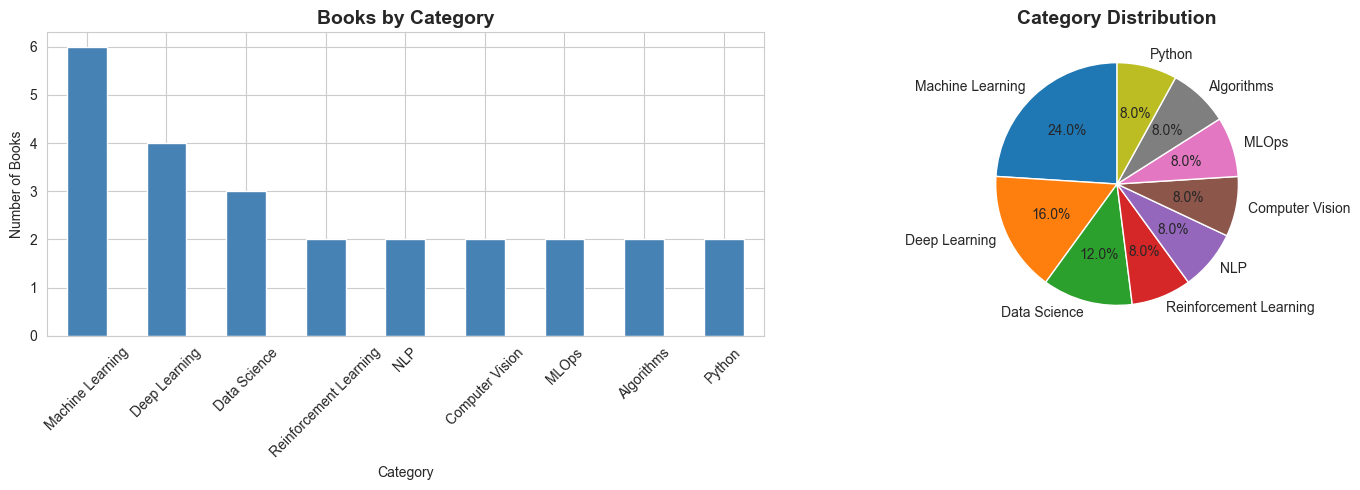

In [5]:
# Cell 4: Category Distribution
print("\n" + "="*60)
print("CATEGORY DISTRIBUTION")
print("="*60)
category_counts = df['category'].value_counts()
print(category_counts)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
category_counts.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Books by Category', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Number of Books')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Category Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()



DIFFICULTY LEVEL DISTRIBUTION
level
Intermediate    12
Advanced         7
Beginner         6
Name: count, dtype: int64


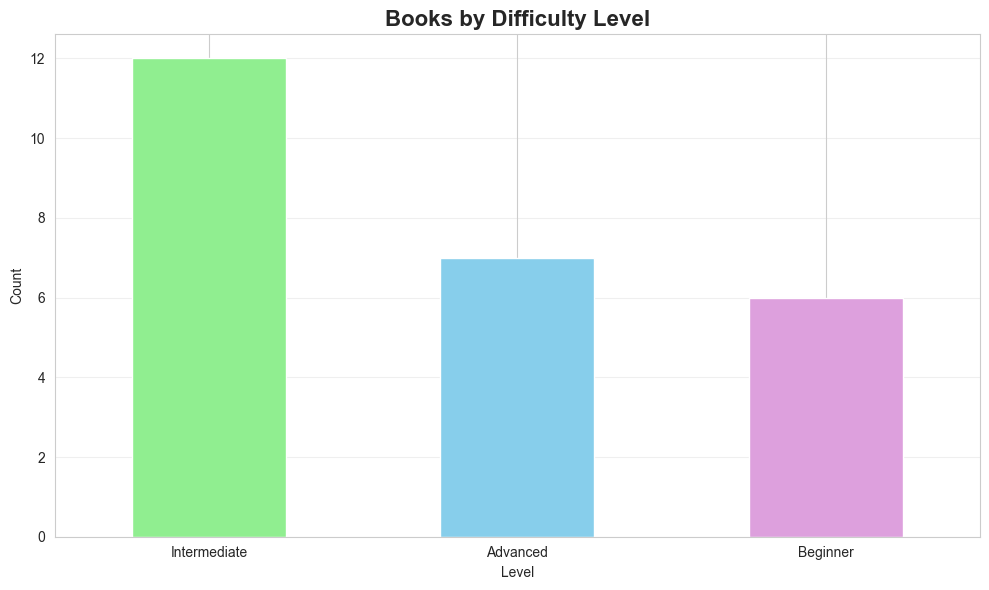

In [6]:
# Cell 5: Level Distribution
print("\n" + "="*60)
print("DIFFICULTY LEVEL DISTRIBUTION")
print("="*60)
level_counts = df['level'].value_counts()
print(level_counts)

plt.figure(figsize=(10, 6))
level_counts.plot(kind='bar', color=['#90EE90', '#87CEEB', '#DDA0DD'])
plt.title('Books by Difficulty Level', fontsize=16, fontweight='bold')
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


RATING ANALYSIS
Mean Rating: 4.50
Median Rating: 4.50
Std Dev: 0.14


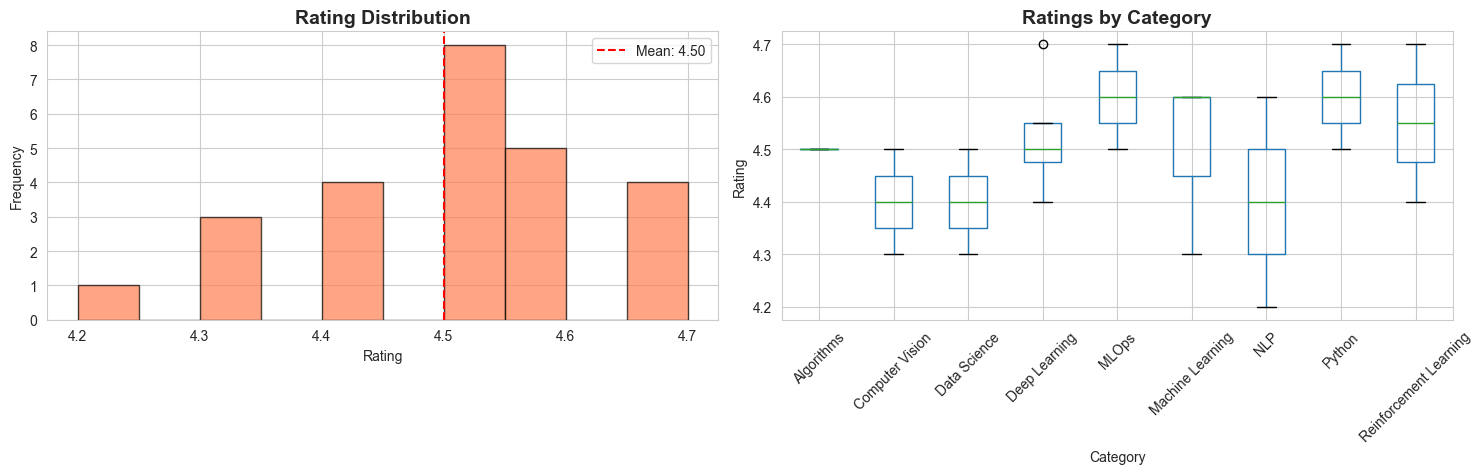

In [7]:
# Cell 6: Rating Analysis
print("\n" + "="*60)
print("RATING ANALYSIS")
print("="*60)
print(f"Mean Rating: {df['rating'].mean():.2f}")
print(f"Median Rating: {df['rating'].median():.2f}")
print(f"Std Dev: {df['rating'].std():.2f}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['rating'], bins=10, color='coral', edgecolor='black', alpha=0.7)
axes[0].set_title('Rating Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['rating'].mean(), color='red', linestyle='--', label=f'Mean: {df["rating"].mean():.2f}')
axes[0].legend()

# Box plot by category
df.boxplot(column='rating', by='category', ax=axes[1])
axes[1].set_title('Ratings by Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Rating')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


PUBLICATION YEAR ANALYSIS
year
2006    1
2009    2
2011    1
2015    1
2016    2
2018    2
2019    5
2020    2
2021    2
2022    6
2023    1
Name: count, dtype: int64


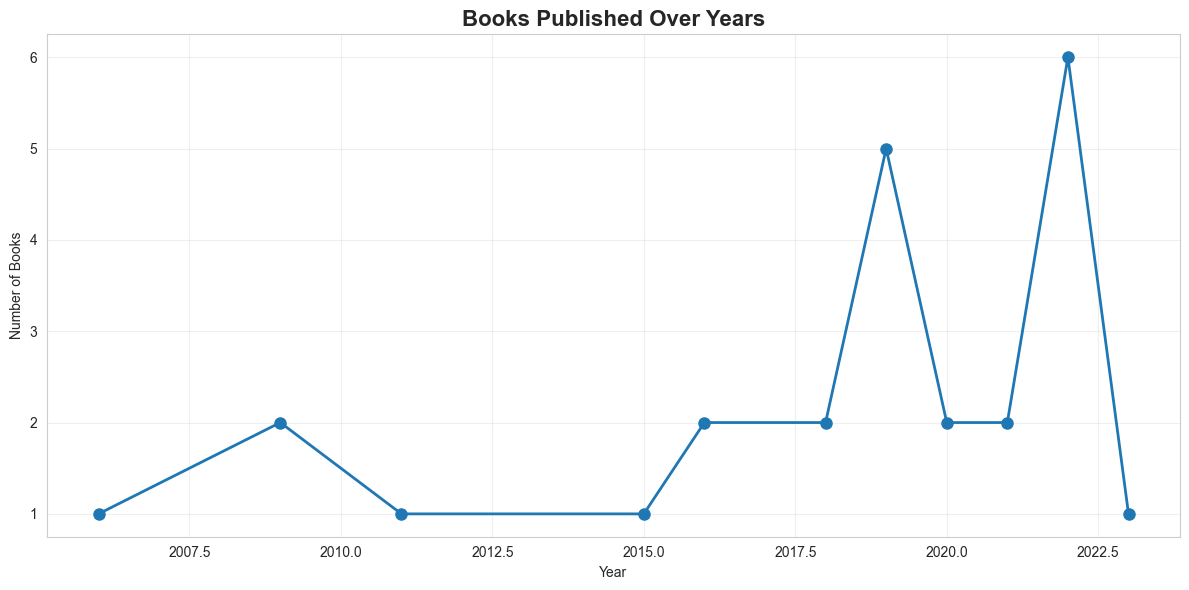

In [8]:
# Cell 7: Year Analysis
print("\n" + "="*60)
print("PUBLICATION YEAR ANALYSIS")
print("="*60)

year_counts = df['year'].value_counts().sort_index()
print(year_counts)

plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linewidth=2, markersize=8)
plt.title('Books Published Over Years', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [9]:
# Cell 8: Top Rated Books
print("\n" + "="*60)
print("TOP 10 RATED BOOKS")
print("="*60)
top_books = df.nlargest(10, 'rating')[['title', 'author', 'rating', 'category']]
print(top_books.to_string(index=False))


TOP 10 RATED BOOKS
                                                             title                                         author  rating               category
                           Reinforcement Learning: An Introduction             Richard S. Sutton, Andrew G. Barto     4.7 Reinforcement Learning
                                Designing Machine Learning Systems                                     Chip Huyen     4.7                  MLOps
                                                     Fluent Python                                Luciano Ramalho     4.7                 Python
                                 Neural Networks and Deep Learning                                Michael Nielsen     4.7          Deep Learning
Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow                                 Aurélien Géron     4.6       Machine Learning
                          Pattern Recognition and Machine Learning                          Christopher M. Bis


CATEGORY vs LEVEL ANALYSIS
level                   Advanced  Beginner  Intermediate
category                                                
Algorithms                     1         0             1
Computer Vision                1         0             1
Data Science                   0         2             1
Deep Learning                  1         3             0
MLOps                          0         0             2
Machine Learning               2         1             3
NLP                            1         0             1
Python                         0         0             2
Reinforcement Learning         1         0             1


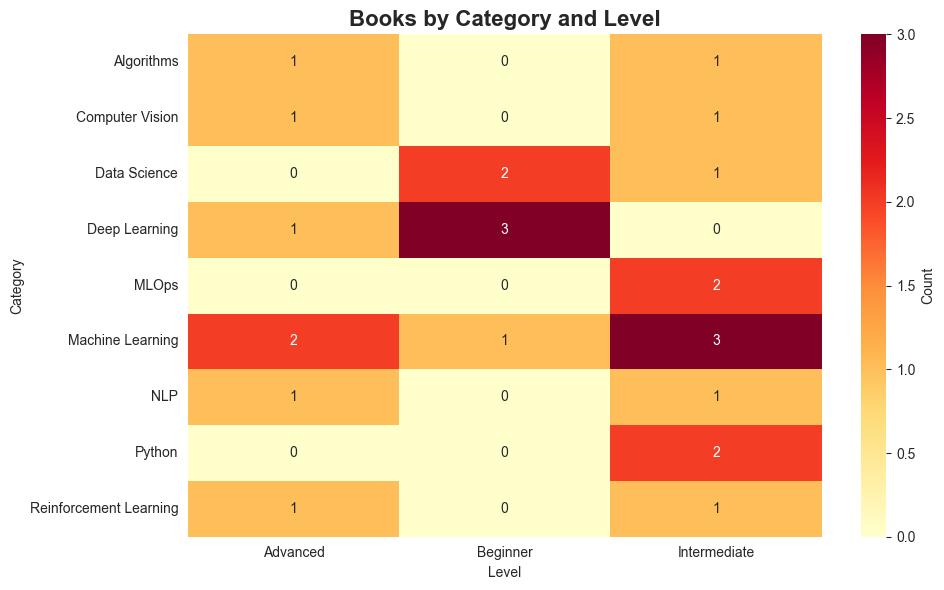

In [10]:
# Cell 9: Category vs Level Heatmap
print("\n" + "="*60)
print("CATEGORY vs LEVEL ANALYSIS")
print("="*60)

pivot_table = pd.crosstab(df['category'], df['level'])
print(pivot_table)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Books by Category and Level', fontsize=16, fontweight='bold')
plt.xlabel('Level')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


CORRELATION ANALYSIS
               rating      year  num_reviews
rating       1.000000  0.186790     0.368146
year         0.186790  1.000000     0.061419
num_reviews  0.368146  0.061419     1.000000


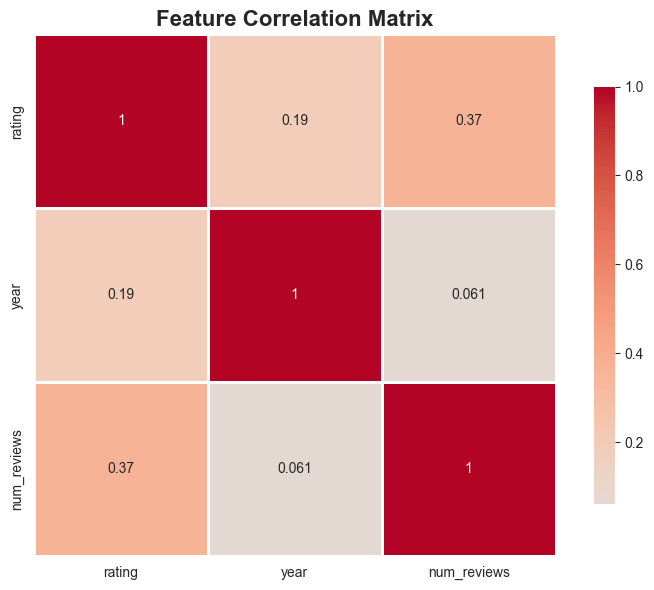

In [12]:
# Cell 10: Correlation Analysis
print("\n" + "="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Create numerical correlation matrix
corr_data = df[['rating', 'year', 'num_reviews']].corr()
print(corr_data)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [16]:
import os

# Ensure directory exists
os.makedirs('backend/data', exist_ok=True)

print("\n" + "="*60)
print("KEY INSIGHTS")
print("="*60)

insights = {
    'Most Popular Category': df['category'].mode()[0],
    'Average Rating': df['rating'].mean(),
    'Highest Rated Book': df.loc[df['rating'].idxmax(), 'title'],
    'Most Common Level': df['level'].mode()[0],
    'Total Books': len(df),
    'Year with Most Publications': df['year'].mode()[0]
}

for key, value in insights.items():
    print(f"{key}: {value}")

# ✅ Save to CSV using forward slashes (cross-platform safe)
df.to_csv('backend/data/tech_books.csv', index=False)

print("\n✓ Data saved to backend/data/tech_books.csv")

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)



KEY INSIGHTS
Most Popular Category: Machine Learning
Average Rating: 4.5
Highest Rated Book: Reinforcement Learning: An Introduction
Most Common Level: Intermediate
Total Books: 25
Year with Most Publications: 2022

✓ Data saved to backend/data/tech_books.csv

ANALYSIS COMPLETE!
